# Visualizing Map in Japan with Matplotlib/Basemap

*@rikipafe, August 20 2015*

### Install pre-requisite requirements.
[http://matplotlib.org/basemap/users/installing.html]

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

## Loading The OpenStreetMap Data with Pandas

* [Open Street Map](http://openstreetmap.org).
* [OSM-x-tractor](http://osm-x-tractor.org/Data.aspx)

In [19]:
import pandas as pd
data = pd.read_csv('POIAsia.csv', nrows=5)
data.columns

Index([u'﻿"osmid"', u'name', u'amenity', u'emergency', u'geological', u'historic', u'leisure', u'man_made', u'office', u'shop', u'sport', u'tourism', u'craft', u'Longitude', u'Latitude'], dtype='object')

In [20]:
columns = ["name", "amenity", "Longitude", "Latitude"]
data = pd.read_csv('POIAsia.csv', usecols=columns)
data.head()

,name,amenity,Longitude,Latitude
0,Sagada Municipal Hall,public_building,120.900729,17.084194
1,East Point,NaN,120.620201,14.385618
2,Intramuros,NaN,120.975330,14.590586
3,NaN,place_of_worship,44.397175,33.325580
4,NaN,place_of_worship,44.395485,33.325715


In [21]:
with_name = data[data.name.notnull()]
with_amenity = data[data.amenity.notnull()]

## Diving Into the Data: Geography of Coffee

One thing we can do with this data is pull-out certain points of interest and compare their distribution on a map.
Here we'll try to reproduce a recent [Reddit Post](https://www.reddit.com/r/MapPorn/comments/2s2a3f/coffee_shop_geography_starbucks_vs_dunkin_donuts/) which maps the distribution of Dunkin Donuts and Starbucks locations in the US.

First, we must further filter the data by the name column.
Dask lets us use Pandas-style masking and vectorized string operations, so we can do this as follows:

In [22]:
with_name.name.value_counts().head(100)

セブン-イレブン               3468
Сбербанк               3383
7-Eleven               2960
К-150                  2506
ファミリーマート               2486
ローソン                   2442
Продукты               2079
Магнит                 1904
К-200                  1620
К-100                  1337
Аптека                 1282
Т-100                  1124
Лукойл                 1110
ENEOS                  1020
マクドナルド                  926
Шиномонтаж              920
McDonald's              830
KFC                     812
К-300                   773
サンクス                    747
Petron                  732
Shell                   723
K-150                   713
サークルK                   698
Masjid                  667
АЗС                     628
7-11                    620
Магазин                 599
セブンイレブン                 587
Supermarket             579
                       ... 
Subway                  275
Цветы                   272
Mosque                  268
ケンタッキーフライドチキン           266
Т-150               

In [23]:
with_name[with_name.name.str.contains('[Ff]amily [Mm]art')]

,name,amenity,Longitude,Latitude
5597,Family Mart,NaN,139.724303,35.954237
5619,Family Mart,NaN,140.112652,36.078337
5763,Family Mart,NaN,139.407293,35.634007
5918,Family Mart,NaN,139.401532,35.613129
6035,Family Mart,NaN,139.359265,35.554238
6172,Family Mart,NaN,139.339455,35.600702
6773,Family Mart,NaN,139.423080,35.557969
7662,family mart,NaN,139.339671,35.636150
8203,Family Mart,NaN,133.262998,35.498108
9335,Family Mart,NaN,136.264399,35.377516


In [25]:
sevenEleven = with_name[with_name.name.str.contains('セブン-イレブン')|
                        with_name.name.str.contains('セブンイレブン')|
                        with_name.name.str.contains('7-11')|
                        with_name.name.str.contains('7-[Ee]leven')|
                        with_name.name.str.contains('[Ss]even [Ee]leven')]
familyMart = with_name[with_name.name.str.contains('ファミリーマート')|
                      with_name.name.str.contains('[Ff]amily [Mm]art')]
lawson = with_name[with_name.name.str.contains('ローソン')|
                      with_name.name.str.contains('[Ll]awson')]

To see how many results we have, we can use a ``count()`` call and pass it to ``dd.compute()`` to see the results.
This is the point when we are finally actually loading the data and computing quantities from the values:

In [26]:
print sevenEleven.name.count(), familyMart.name.count(), lawson.name.count()

8820 3252 3628


We find about 5300 Starbucks and 1300 Dunkin Donuts locations in the global dataset; this is far fewer than the true numbers for these chains, which are around [12000 Starbucks and 8000 Dunkin Donuts](https://www.factual.com/data/t/restaurants-us) in the United States alone!
Evidently, the OpenStreetMap data is not all that complete.
From my own anecdotal experience with the dataset, I've found that the data tends to be fairly complete in dense urban areas, while missing many details in more sparsely-populated locations.

Despite this incompleteness, let's push-on with the data we have and see what we can discover.
We can start by computing and extracting the latitude and longitude from the graphs we have generated.
We will do this in a single ``dd.compute()`` call, so that the data will be ingested only once:

In [34]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

def draw_USA():
    """initialize a basemap centered on the continental USA"""
    plt.figure(figsize=(14, 10))
    return Basemap(projection='lcc', resolution='l',
                   llcrnrlon=120, urcrnrlon=160,
                   llcrnrlat=22, urcrnrlat=49,
                   lat_1=33, lat_2=45, lon_0=130,
                   area_thresh=10000)

Now that we have this data, we can use matplotlib's [basemap](http://matplotlib.org/basemap/) toolkit to visualize the results on a map:

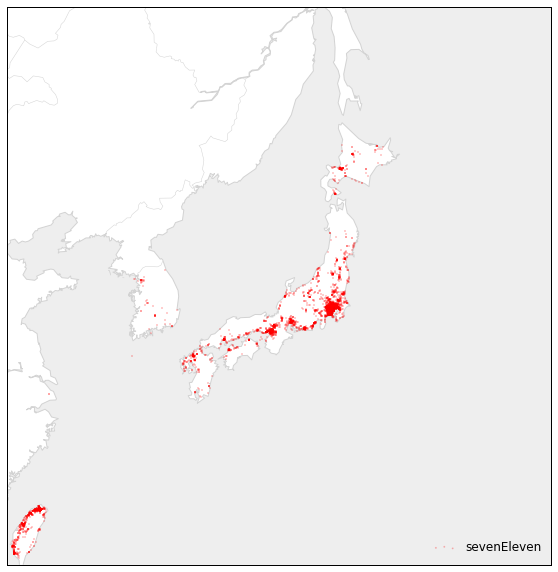

In [42]:
m = draw_USA()
    
# Draw map background
m.fillcontinents(color='white', lake_color='#eeeeee')
m.drawstates(color='lightgray')
m.drawcoastlines(color='lightgray')
m.drawcountries(color='lightgray')
m.drawmapboundary(fill_color='#eeeeee')

# Plot the values in Starbucks Green and Dunkin Donuts Orange
style = dict(s=1, marker='o', alpha=0.2, zorder=2)
m.scatter(sevenEleven.Longitude.values,
          sevenEleven.Latitude.values, latlon=True,
          label="sevenEleven", color='red', **style)
#m.scatter(familyMart.Longitude.values,
#          familyMart.Latitude.values, latlon=True,
#          label="familyMart", color='blue', **style)
#m.scatter(lawson.Longitude.values,
#          lawson.Latitude.values, latlon=True,
#          label="lawson", color='green', **style)
plt.legend(loc='lower right', frameon=False);

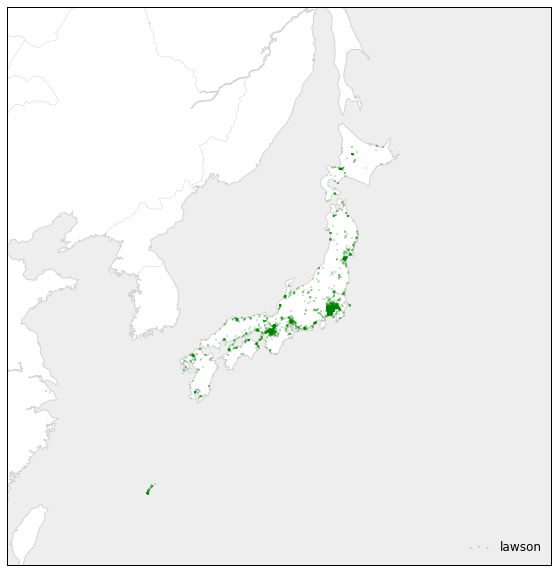

In [39]:
m = draw_USA()
    
# Draw map background
m.fillcontinents(color='white', lake_color='#eeeeee')
m.drawstates(color='lightgray')
m.drawcoastlines(color='lightgray')
m.drawcountries(color='lightgray')
m.drawmapboundary(fill_color='#eeeeee')

# Plot the values in Starbucks Green and Dunkin Donuts Orange
style = dict(s=1, marker='o', alpha=0.2, zorder=2)
#m.scatter(sevenEleven.Longitude.values,
#          sevenEleven.Latitude.values, latlon=True,
#          label="sevenEleven", color='red', **style)
#m.scatter(familyMart.Longitude.values,
#          familyMart.Latitude.values, latlon=True,
#          label="familyMart", color='blue', **style)
m.scatter(lawson.Longitude.values,
          lawson.Latitude.values, latlon=True,
          label="lawson", color='green', **style)
plt.legend(loc='lower right', frameon=False);

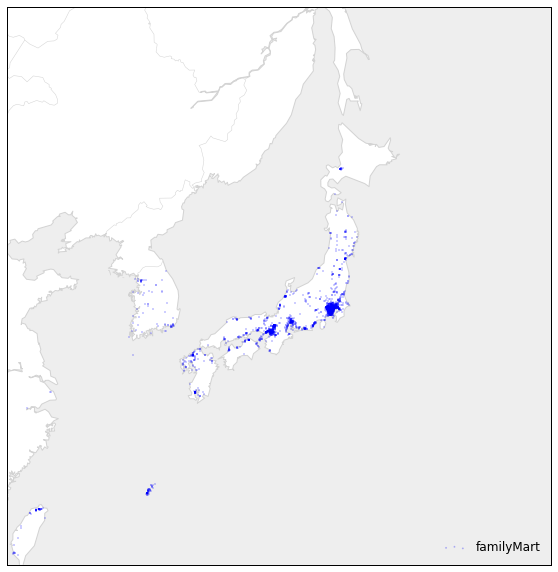

In [41]:
m = draw_USA()
    
# Draw map background
m.fillcontinents(color='white', lake_color='#eeeeee')
m.drawstates(color='lightgray')
m.drawcoastlines(color='lightgray')
m.drawcountries(color='lightgray')
m.drawmapboundary(fill_color='#eeeeee')

# Plot the values in Starbucks Green and Dunkin Donuts Orange
style = dict(s=1, marker='o', alpha=0.2, zorder=2)
#m.scatter(sevenEleven.Longitude.values,
#          sevenEleven.Latitude.values, latlon=True,
#          label="sevenEleven", color='red', **style)
m.scatter(familyMart.Longitude.values,
          familyMart.Latitude.values, latlon=True,
          label="familyMart", color='blue', **style)
#m.scatter(lawson.Longitude.values,
#          lawson.Latitude.values, latlon=True,
#          label="lawson", color='green', **style)
plt.legend(loc='lower right', frameon=False);

## Fast Food Nation

Let's look at a different set of this data, via the "amenity" column.
We can call the ``count()`` method to check how many rows of the data have ``amenity`` specified:

In [29]:
with_amenity.amenity.count()

757082

We see just over five million rows with an amenity label.
With Pandas' ``value_counts()`` function, we can examine the most common of these labels in the dataset.
Here the ``head()`` call triggers a computation:

In [30]:
with_amenity.amenity.value_counts().head(20)

school              65773
restaurant          65433
place_of_worship    58351
fuel                47487
hospital            40687
kindergarten        38507
bank                33488
post_office         28768
cafe                27362
parking             25229
police              23834
social_facility     23235
pharmacy            21082
fast_food           19864
atm                 19604
toilets             14784
public_building     14201
bench               11727
drinking_water       9908
dentist              8880
dtype: int64

In [31]:
is_fastfood = with_amenity.amenity.str.contains('fast_food')
fastfood = with_amenity[is_fastfood]
fastfood.name.value_counts().head(12)

マクドナルド           919
McDonald's       778
KFC              709
松屋               489
Jollibee         411
すき家              397
モスバーガー           349
吉野家              335
ケンタッキーフライドチキン    263
Subway           227
CoCo壱番屋          173
Chowking         159
dtype: int64

In [32]:
lat, lon = fastfood.Latitude, fastfood.Longitude

In [33]:
m = draw_JPN()
    
# Draw map background
m.fillcontinents(color='white', lake_color='#eeeeee')
m.drawstates(color='lightgray')
m.drawcoastlines(color='lightgray')
m.drawcountries(color='lightgray')
m.drawmapboundary(fill_color='#eeeeee')

# Plot the values in Starbucks Green and Dunkin Donuts Orange
style = dict(s=5, marker='o', alpha=0.5, zorder=2)
m.scatter(lon, lat, size=10)

NameError: name 'draw_JPN' is not defined

In [ ]:
m = draw_JPN()
    
m.drawmapboundary(fill_color='#ffffff', linewidth=0)
m.fillcontinents(color="#fcfcfc", lake_color='#ffffff', zorder=1)

m.scatter(lon.values, lat.values, latlon=True,
          s=1, marker='o', alpha=0.1, zorder=2);

Here I've purposely left-out the geographical borders; we see that with fast food locations alone, we can see the major cities, and even trace-out some of the major interstate routes!
I suspect that, like above, this data is far from complete, especially in more rural areas.
I would love to see how a *full* fast-food-nation map would look, but after poking around it seems that most available data on that is proprietary (though FlowingData has an [interesting visualization](http://flowingdata.com/2014/06/24/burger-place-geography/) in the same spirit).

## Pubs of the British Isles

Let's take a look at one last example, reproducing a [post](http://ramiro.org/notebook/mapping-pubs/?imm_mid=0d697c&cmp=em-data-na-na-newsltr_20150812) by Ramiro Gomez, a developer in Berlin whose website is definitely worth clicking around for a bit.
Here we will extract all the pub locations from the dataset, and use them to visualize a small island nation with an astounding density of these establishments.

We'll start by filtering the amenities for the word "pub" (being careful to use regular expressions which mark word boundaries, so that we don't match things like "public toilet"):

In [ ]:
is_pub = with_amenity.amenity.str.contains(r'\bpub\b')
pubs = with_amenity[is_pub]
pubs.amenity.count().compute()

We have about 95,000 world-wide points of interest with "pub" in the label.

Next, as above, we can extract the longitude and latitude arrays from our data:

In [ ]:
lon, lat = dd.compute(pubs.Longitude, pubs.Latitude)

Finally, with a few lines of Basemap code, we can visualize the results:

In [ ]:
fig, ax = plt.subplots(figsize=(10, 15))
m = Basemap(projection='mill',
            lon_0=-5.23636, lat_0=53.866772,
            llcrnrlon=-10.65073, llcrnrlat=49.16209,
            urcrnrlon=1.76334, urcrnrlat=60.860699)
m.drawmapboundary(fill_color='#ffffff', linewidth=.0)
x, y = m(lon.values, lat.values)
m.scatter(x, y, s=1, marker=',', color="steelblue", alpha=0.8);

The pub locations alone are enough to make out most of the borders and contours of the islands!

---

The above visualizations are fun, but have merely scraped the surface of what can be done with this data – what interesting geographical visualizations can you come up with using these data and tools?

Thanks for reading!

<small>
This post was written entirely in the IPython notebook.  You can [download](http://jakevdp.github.io/downloads/notebooks/OutOfCoreMapping.ipynb) this notebook, or see a static view on [nbviewer](http://nbviewer.ipython.org/url/jakevdp.github.io/downloads/notebooks/OutOfCoreMapping.ipynb).
</small>